# Sentiment Analysis with LSTMs

Let's build a more sophisticated model with LSTMs using word embeddings in Tensorflow.

## Loading word vectors

First, we want to create our word vectors. For simplicity, we're going to be using a pretrained model.

There are 2 most common models of word embedding.
 - Word2Vec which is implemented by Google. It has 3 million word vectors, each with a dimensionality of 300. This word vectors matrix is quite large (3.6GB).
 - GloVe which is developed by Stanford. It is a more manageable matrix. There are various sizes of datasets. 

We are going to use 400,000 word vectors, each with a dimensionality of 50 which is trained using Glove.

In [1]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


We've loaded the dimensions of the vocabulary list and the embedding matrix.

### Working with vocabulary list and embedding matrix

In [3]:
likeIndex = wordsList.index('like')
wordVectors[likeIndex]

array([ 3.6808e-01,  2.0834e-01, -2.2319e-01,  4.6283e-02,  2.0098e-01,
        2.7515e-01, -7.7127e-01, -7.6804e-01, -3.4861e-01,  5.0620e-01,
       -2.4401e-01,  7.1775e-01, -3.3348e-01,  3.7554e-01,  4.4756e-01,
        3.6698e-01,  4.3533e-01,  4.7570e-01, -5.6113e-02, -9.3531e-01,
       -2.7591e-01,  3.1610e-01,  2.2116e-01,  3.6304e-01,  1.0757e-01,
       -1.7638e+00, -1.2624e+00,  3.0284e-01,  5.6286e-01, -1.0214e+00,
        3.2353e+00,  4.8483e-01,  2.7953e-02,  3.6082e-02, -7.8554e-02,
        1.8761e-01, -5.2573e-01,  3.7200e-02,  2.7579e-01, -7.7360e-02,
       -2.7955e-01,  7.9752e-01,  1.6028e-03,  4.5479e-01,  8.8382e-01,
        4.3893e-01, -1.9263e-01, -6.7236e-01, -3.9709e-01,  2.5183e-01],
      dtype=float32)

In [4]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

/home/bb/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [7]:
with tf.Session() as sess:
    wordvectors = tf.nn.embedding_lookup(wordVectors,firstSentence).eval()
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [8]:
print(wordvectors)

[[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
  -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
   1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
   3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
   5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
  -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
  -2.6671e-01  9.2121e-01]
 [ 4.2762e-01 -1.1469e-01  1.0506e-02 -5.4662e-01  8.9055e-01  1.9263e-01
  -6.5374e-01  8.7461e-02 -6.9830e-01  2.8020e-01  1.7176e-01  3.1886e-01
  -4.6253e-01 -1.3414e-01  6.2070e-01  3.3603e-01  4.7793e-01 -4.6861e-02
  -4.5179e-01 -3.2765e-01 -7.3017e-01  4.1449e-01  5.6783e-01  3.8010e-02
   1.0140e+00 -1.8850e+00 -9.4402e-01  6.5002e-02  5.4992e-01 -4.6939e-01
   2.7234e+

## Helper functions

Let's define a couple of helper functions. The first is a function to make sure the sentence is in the proper format, and the second is a function that obtains the word vectors for each of the words in a given sentence. 

In [61]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
from random import randint

strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

def getSentenceMatrix(sentence):
    sentenceMatrix = np.zeros([batchSize,maxSeqLength], dtype='int32')
    cleanedSentence = cleanSentences(sentence)
    split = cleanedSentence.split()
    for indexCounter,word in enumerate(split):
        try:
            sentenceMatrix[0,indexCounter] = wordsList.index(word)
        except ValueError:
            sentenceMatrix[0,indexCounter] = 399999 #Vector for unkown words
    return sentenceMatrix

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,3) #randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(8,10)# randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(4,7) #randint(11499,13499)
        if (num <= 5): #12499
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

## Loading data

Now, let's load the sample movie training set. For simplicity of a computationally expensive process, we will use 10 negative samples and 10 positive samples and integerize it to get a 10 x 20 matrix.

In [10]:
from os import listdir
from os.path import isfile, join


maxSeqLength = 20 # maximum length of sentences
numFiles = 10 # number of files

ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0

positiveFiles = ['data/positive/' + f for f in listdir('data/positive/') if isfile(join('data/positive/', f))]
negativeFiles = ['data/negative/' + f for f in listdir('data/negative/') if isfile(join('data/negative/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline() 

        indexCounter = 0
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        
        counter = len(split)
        numWords.append(counter)  
        
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1  
        
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        
        
        indexCounter = 0
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        counter = len(split)
        numWords.append(counter)  
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 
        
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))


np.save('idsMatrix1', ids)
print(np.array(ids).shape)

Positive files finished
Negative files finished
The total number of files is 10
The total number of words in the files is 58
The average number of words in the files is 5.8
(10, 20)


In [11]:
ids = np.load('idsMatrix1.npy')

### Working with a file's data

In [12]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

It is a true classic.



In [13]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter < maxSeqLength:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([  20,   14,    7, 1446, 2392,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

# The Embedding layer

The embedding matrix is represented as a "layer", and maps positive integers (indices corresponding to words) into dense vectors of fixed size (the embedding vectors). It can be trained or initialized with a pretrained embedding. 

The Embedding() layer takes an integer matrix of size (batch size, max input length) as input. This corresponds to sentences converted into lists of indices (integers), as shown in the figure below.


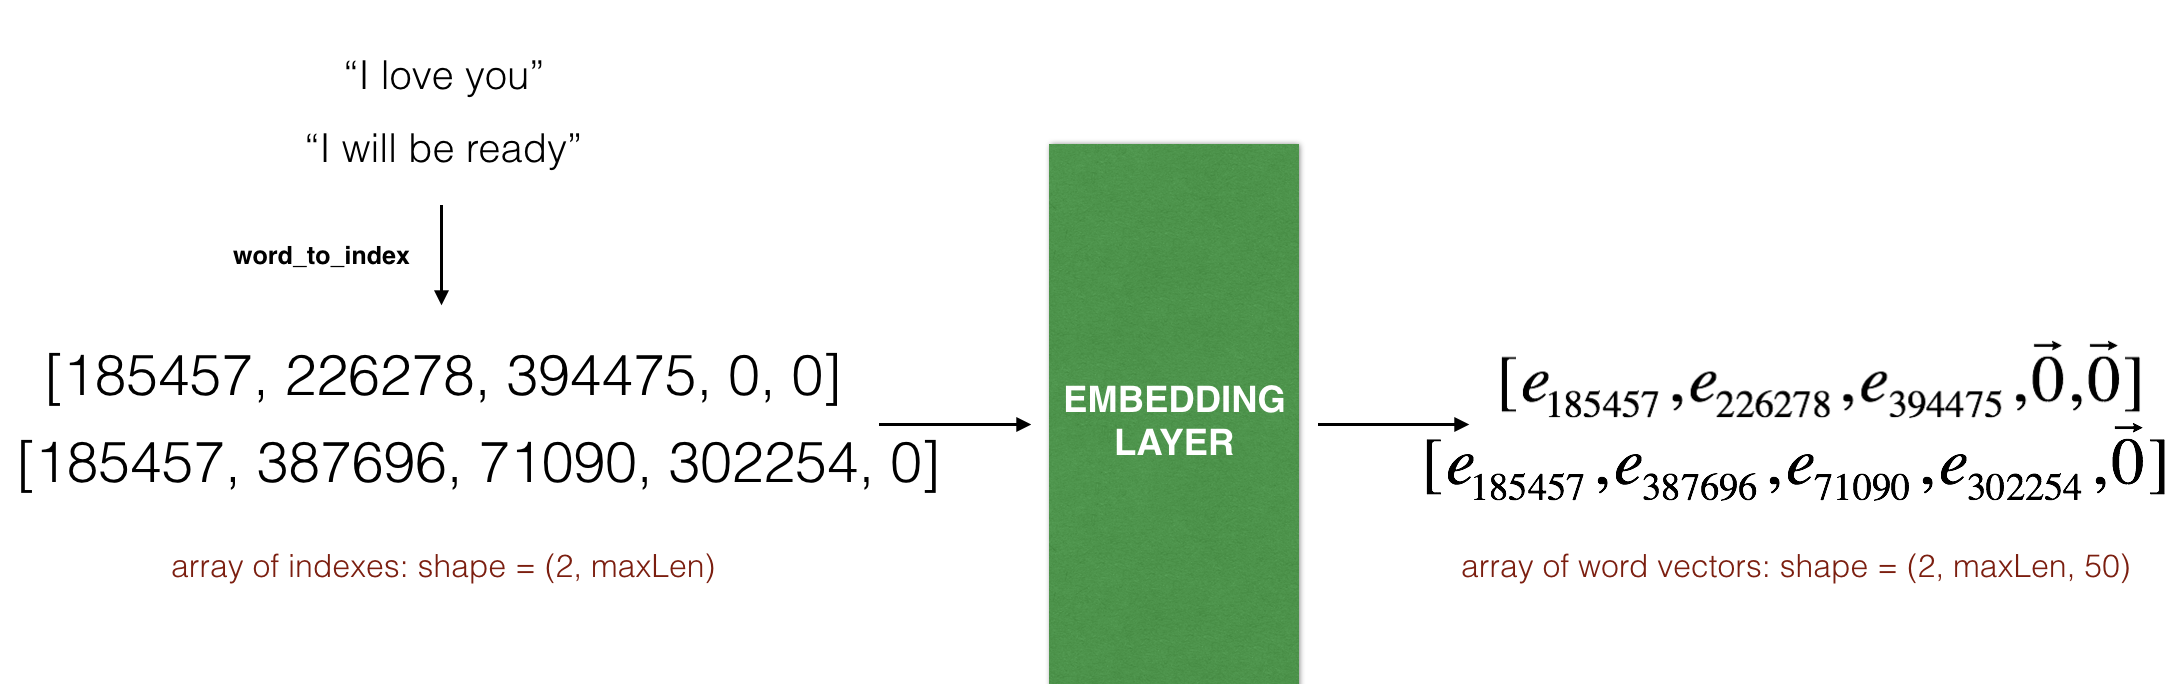

# LSTM Network

We will do so using the embedding layer we have built, and feed its output to an LSTM network.

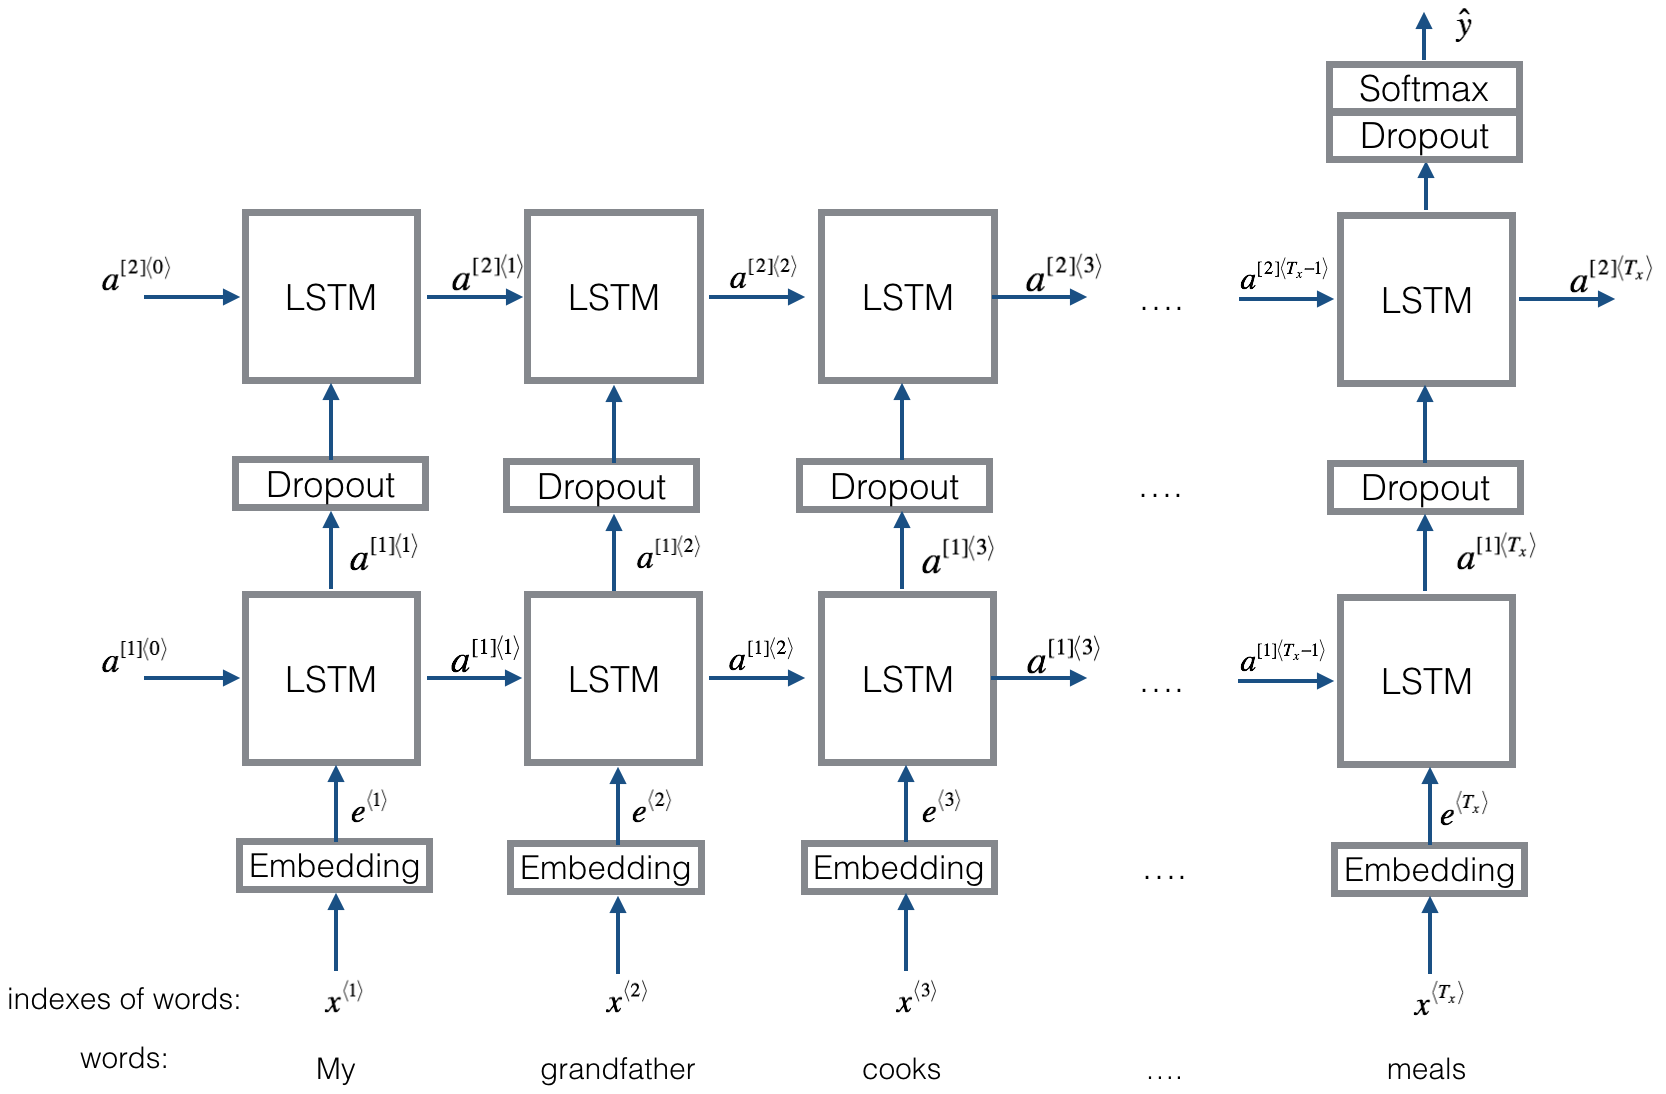

In [62]:
batchSize = 3#24
lstmUnits = 8 #64
numClasses = 2
iterations = 500 #100000

In [63]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [64]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [65]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [66]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [67]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [68]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

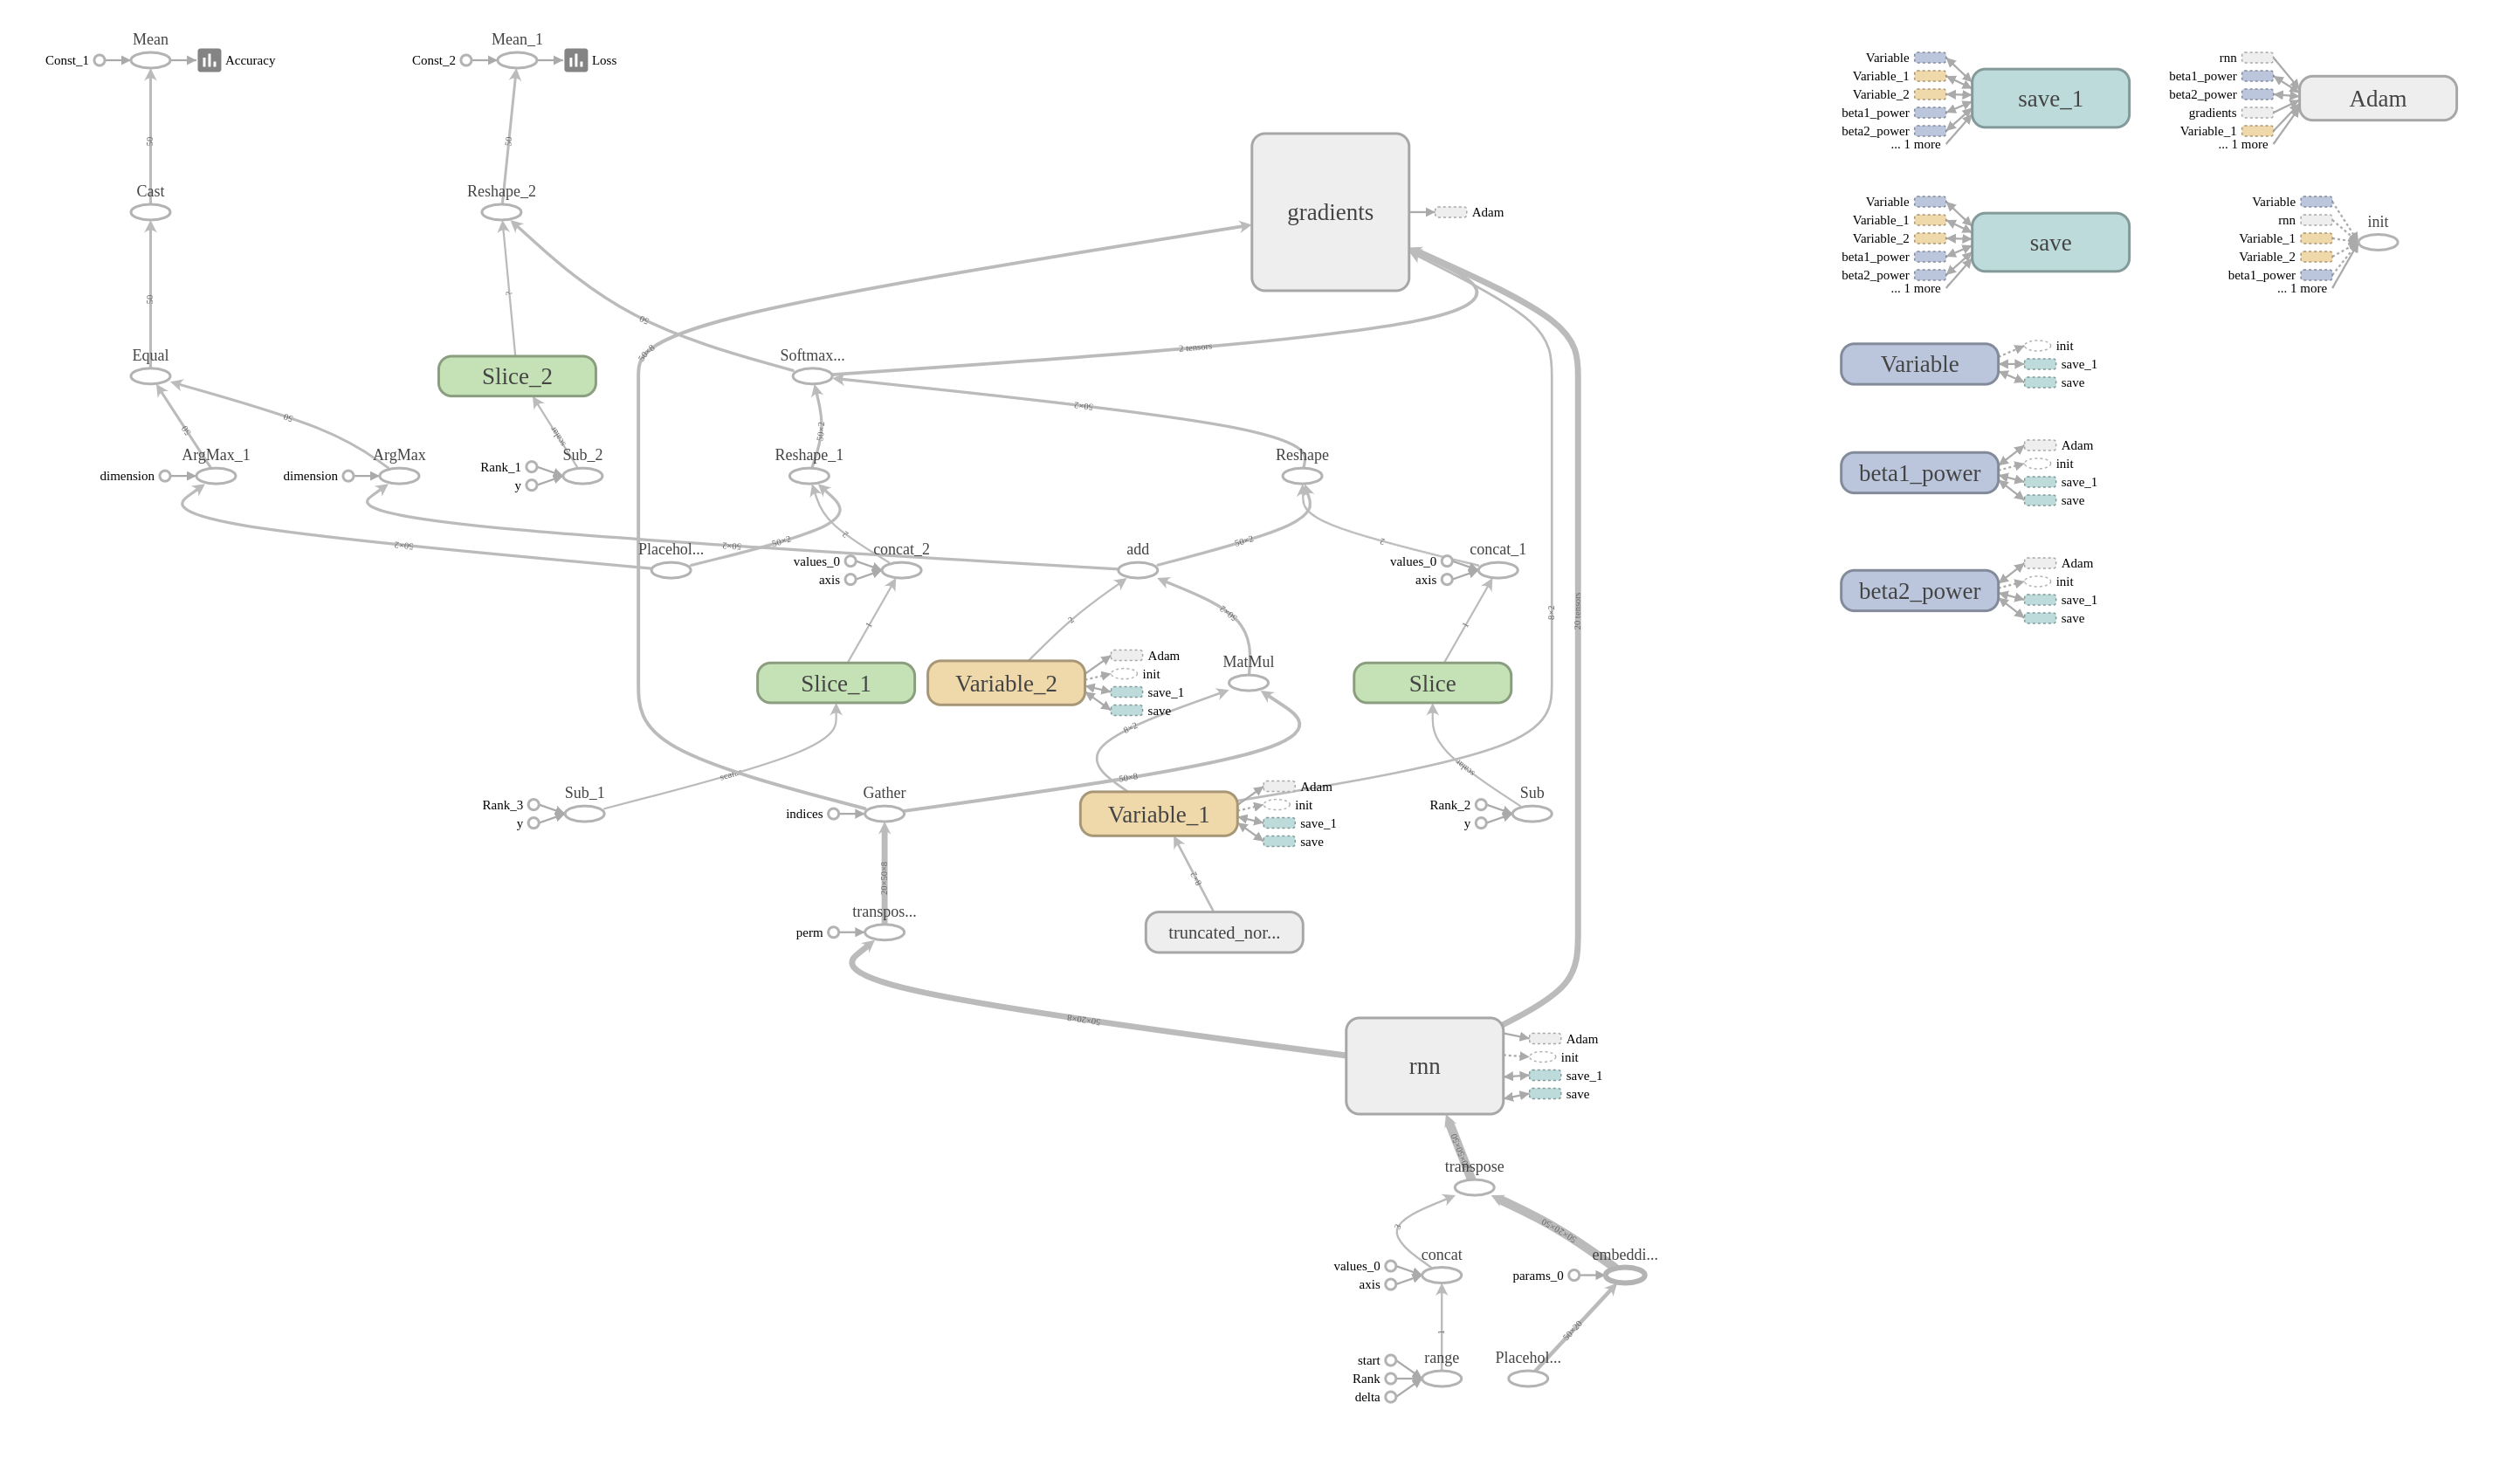

If you’d like to use Tensorboard to visualize the loss and accuracy values, you can also run and the modify the following code. 

In [69]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

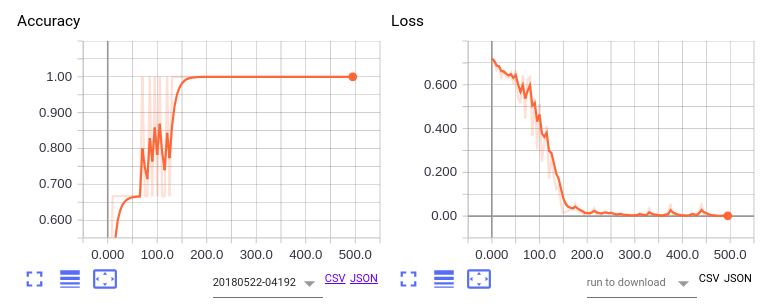

# Training

We can track a training progress using [TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard). While the following cell is running, you can use your terminal to enter the directory that contains this notebook, enter `tensorboard --logdir=tensorboard`, and visit http://localhost:6006/ with a browser to keep an eye on the training progress.

In [70]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    #Write summary to Tensorboard
    if (i % 5 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    #Save the network every 10,000 training iterations
    if (i % 100 == 0 and i != 0): #10000
        save_path = saver.save(sess, "models1/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
writer.close()

saved to models1/pretrained_lstm.ckpt-100
saved to models1/pretrained_lstm.ckpt-200
saved to models1/pretrained_lstm.ckpt-300
saved to models1/pretrained_lstm.ckpt-400


# Loading a Pretrained Model

Our pretrained model’s accuracy and loss curves during training can be found below. 

In [59]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models1'))

INFO:tensorflow:Restoring parameters from models1/pretrained_lstm.ckpt-400


In [60]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0
Accuracy for this batch: 100.0


# Prediction

In [29]:
inputText = "I do not like it"
inputMatrix = getSentenceMatrix(inputText)

In [30]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
# predictedSentiment[0] represents output score for positive sentiment
# predictedSentiment[1] represents output score for negative sentiment

if (predictedSentiment[0] > predictedSentiment[1]):
    print("Positive Sentiment")
else:
    print("Negative Sentiment")

Positive Sentiment


- http://167.99.175.213:8180/sentiment?inputtext=I%20like%20it
- http://167.99.175.213:8180/sentiment?inputtext=I%20don%27t%20like%20it